In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
import matplotlib.pyplot as plt

In [8]:
X=df.iloc[:,[2,4]].values

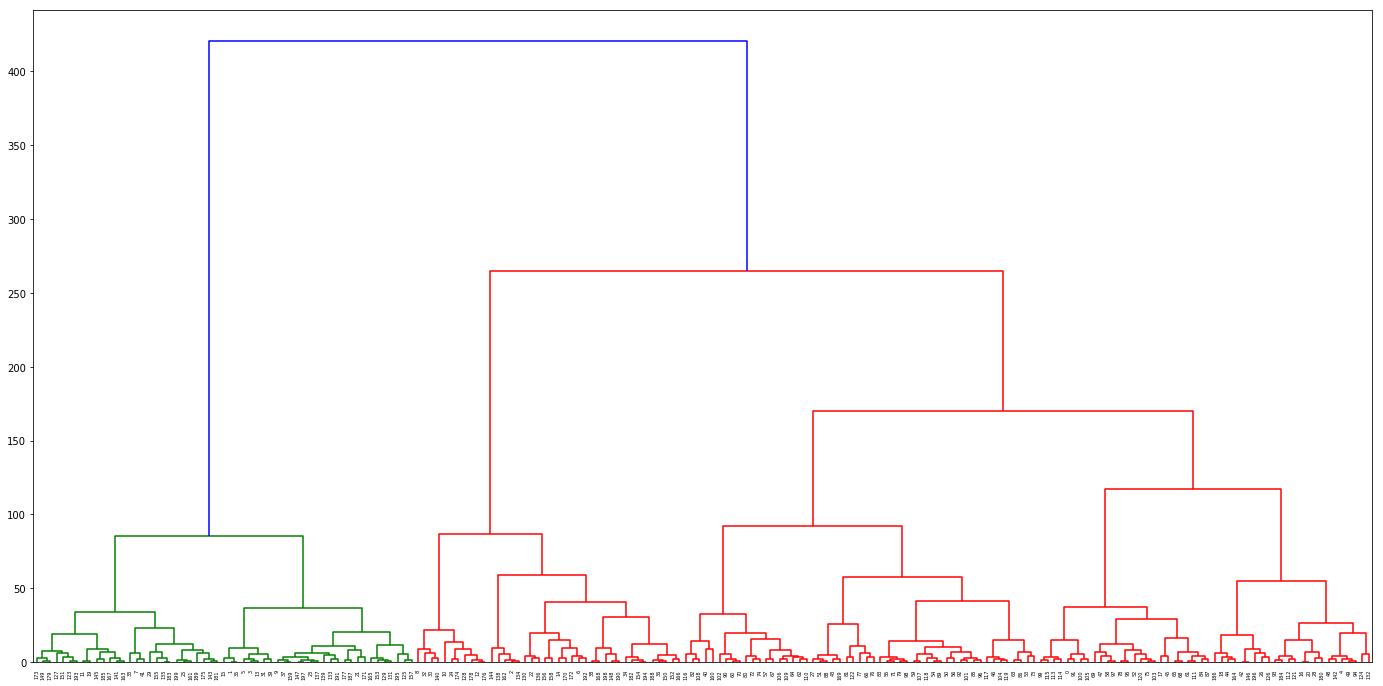

In [9]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(24,12))
#dendrogram=sch.dendrogram(sch.linkage(X,method="single"))
#dendrogram=sch.dendrogram(sch.linkage(X,method="complete"))
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))

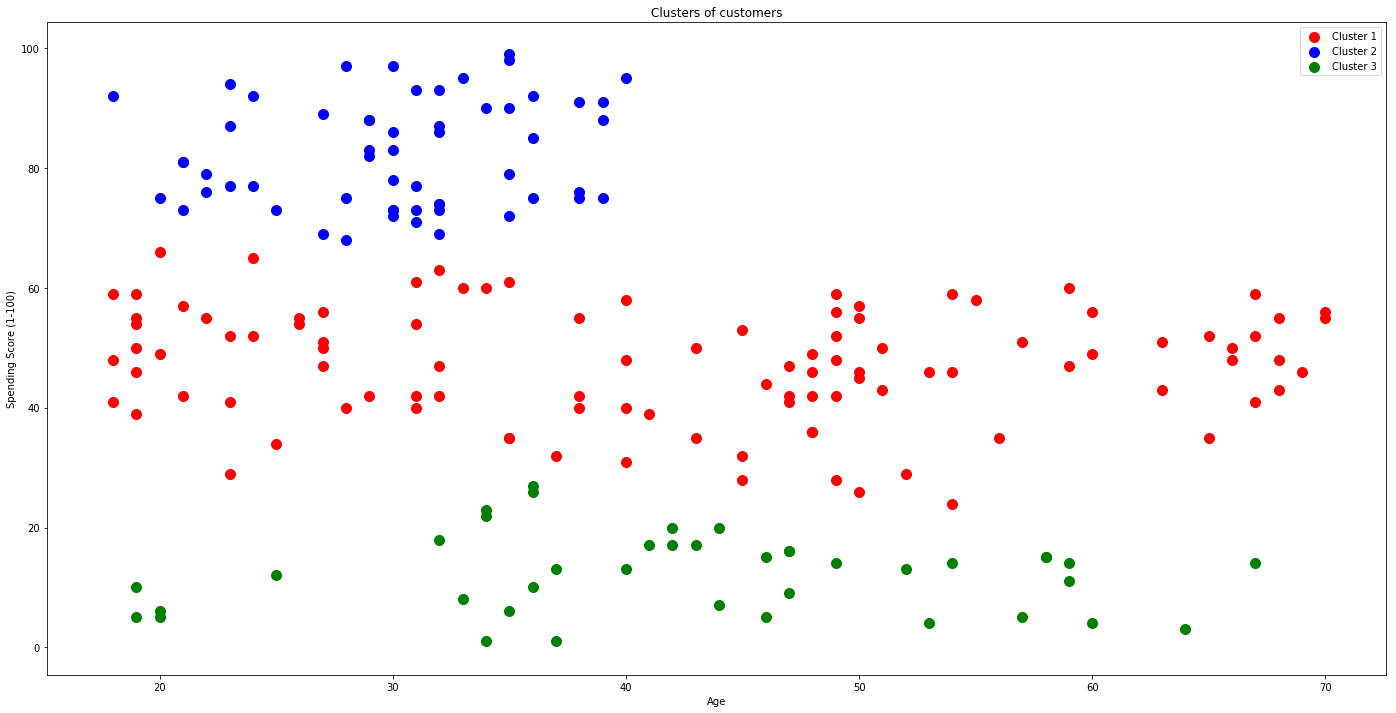

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(24,12))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [11]:
X=df.iloc[:,[2,3,4]].values

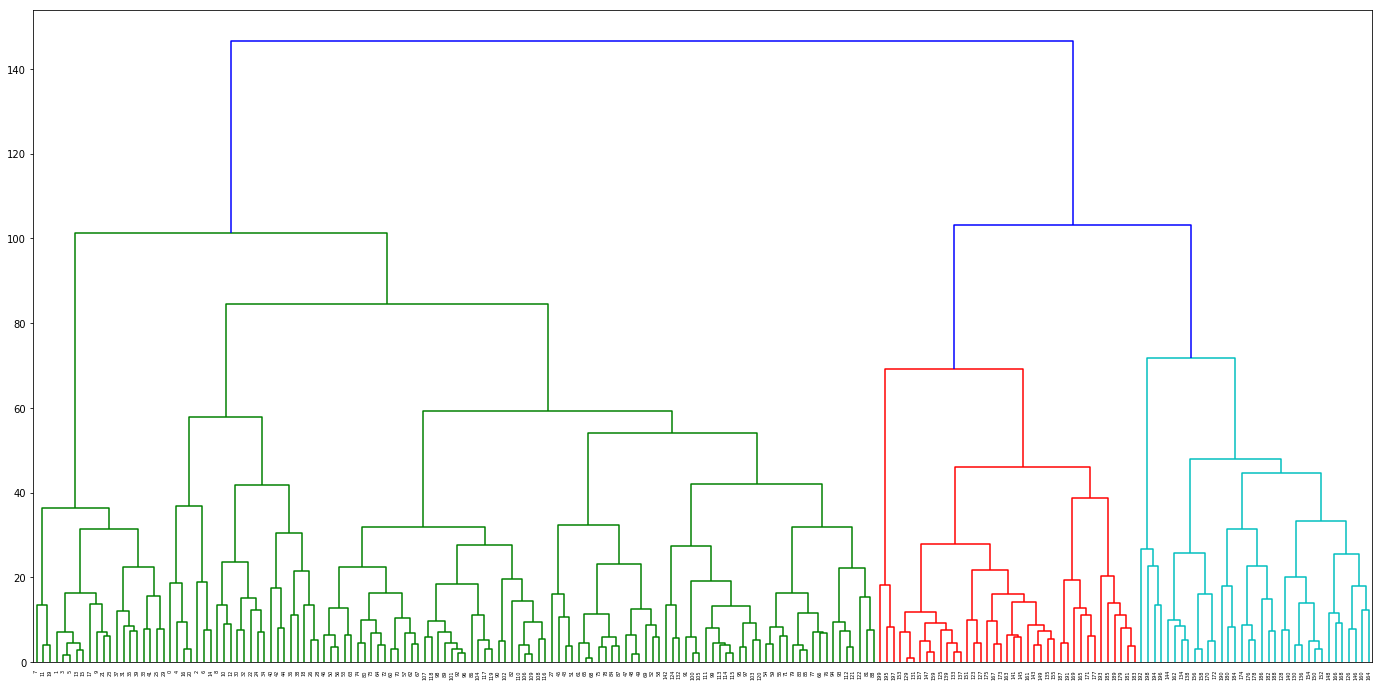

In [12]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(24,12))
#dendrogram=sch.dendrogram(sch.linkage(X,method="single"))
dendrogram=sch.dendrogram(sch.linkage(X,method="complete"))
#dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


In [17]:
#Derive insights from every clusters
pd.DataFrame(X[y_hc==2],columns=["age","income","score"]).describe()

,age,income,score
count,39.000000,39.000000,39.000000
mean,32.692308,86.538462,82.128205
std,3.728650,16.312485,9.364489
min,27.000000,69.000000,63.000000
25%,30.000000,75.500000,74.500000
50%,32.000000,79.000000,83.000000
75%,35.500000,95.000000,90.000000
max,40.000000,137.000000,97.000000
